In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
pip install diffusers torch matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.9 MB/s eta 0:00:00


In [ ]:
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image
import torch

pipe = AutoPipelineForInpainting.from_pretrained("diffusers/stable-diffusion-xl-1.0-inpainting-0.1", torch_dtype=torch.float16, variant="fp16").to("cuda")

img_url = "/content/drive/MyDrive/Inpainting/inpainting_examples/bertrand-gabioud-CpuFzIsHYJ0.png"
mask_url = "/content/drive/MyDrive/Inpainting/inpainting_examples/bertrand-gabioud-CpuFzIsHYJ0_mask.png"

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'decay': 0.9999, 'inv_gamma': 1.0, 'min_decay': 0.0, 'optimization_step': 37000, 'power': 0.6666666666666666, 'update_after_step': 0, 'use_ema_warmup': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [ ]:
image = load_image(img_url).resize((1024, 1024))
mask_image = load_image(mask_url).resize((1024, 1024))

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg


# # Load and display the original image
# org_img = mpimg.imread(image)
# plt.figure(figsize=(8, 4))
# plt.subplot(1, 2, 1)
# plt.imshow(org_img)
# plt.title('Original Image')
# plt.axis('off')

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg


# # Load and display the original image
# masked_img = mpimg.imread(mask_url)
# plt.figure(figsize=(8, 4))
# plt.subplot(1, 2, 1)
# plt.imshow(org_img)
# plt.title('Masked Image')
# plt.axis('off')

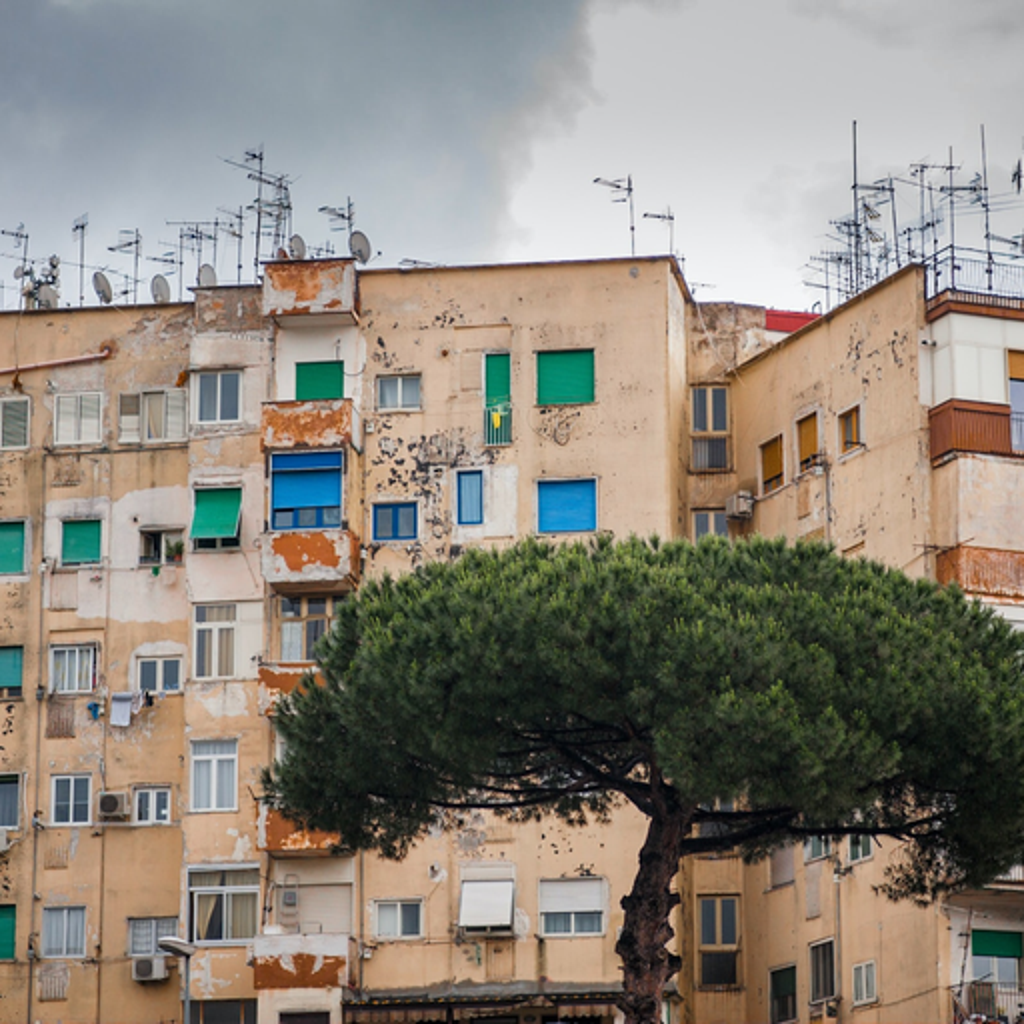

In [ ]:
image

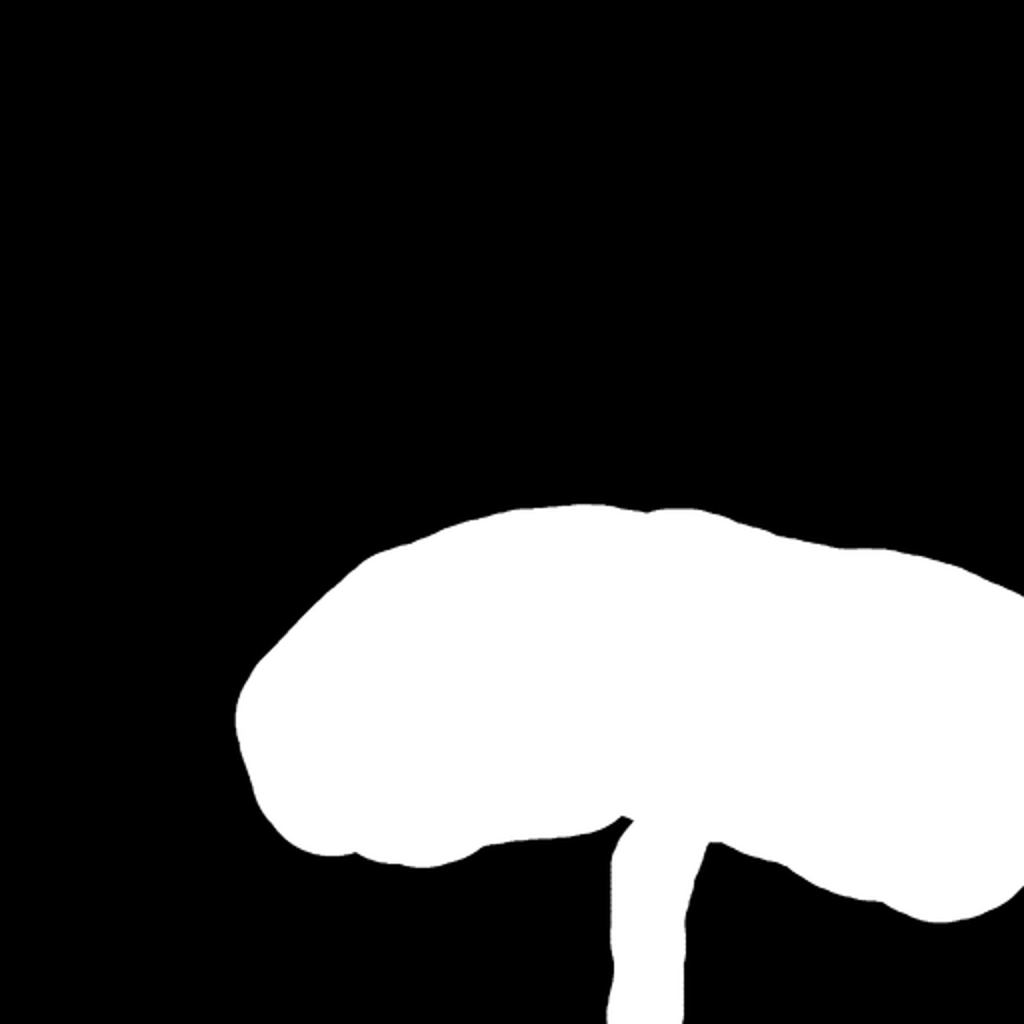

In [ ]:
mask_image

In [ ]:
prompt = "blend with background"
generator = torch.Generator(device="cuda").manual_seed(0)

generated_image = pipe(
  prompt=prompt,
  image=image,
  mask_image=mask_image,
  guidance_scale=8.0,
  num_inference_steps=20,  # steps between 15 and 30 work well for us
  strength=0.99,  # make sure to use `strength` below 1.0
  generator=generator,
).images[0]

  0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg


# # Load and display the original image
# gen_img = mpimg.imread(generated_image)
# plt.figure(figsize=(8, 4))
# plt.subplot(1, 2, 1)
# plt.imshow(gen_img)
# plt.title('Inpainted Image')
# plt.axis('off')

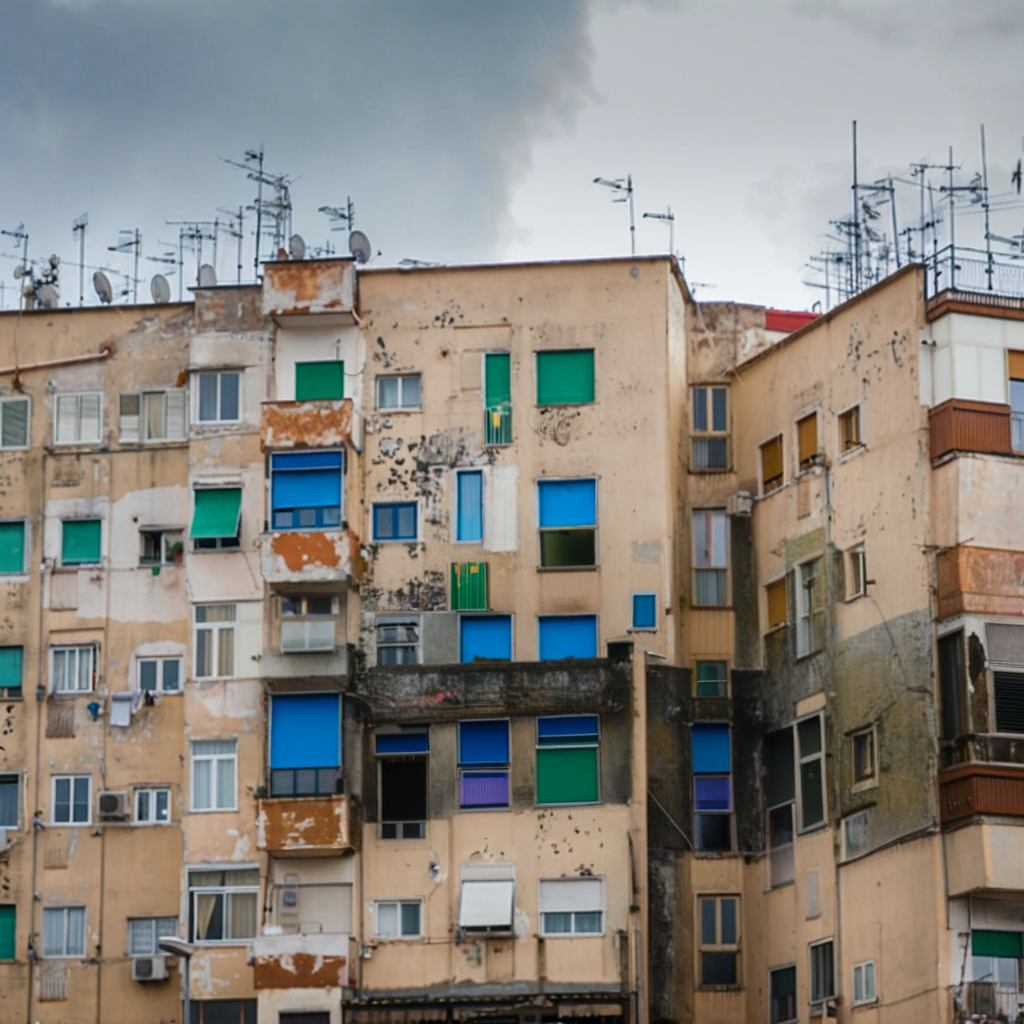

In [ ]:
generated_image

In [ ]:
generated_image.save('output.png')